In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
shop_data = pd.read_csv("online_shoppers_intention.csv") # 12330 rows x 18 columns
shop_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


* ***Administrative***
* ***Administrative Duration***
* ***Informational***
* ***Informational Duration***
* ***Product Related***
* ***Product Related Duration***  
represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* ***Bounce Rate***:  
the feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
* ***Exit Rate***:  
the feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
* ***Page Value***:  
the feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

* ***Special Day***  
the feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Data Analysis

In [3]:
see = shop_data

In [4]:
see[['Administrative', 'Revenue']].groupby(['Administrative'], as_index=False).mean().sort_values(by='Revenue', ascending=False)



,Administrative,Revenue
25,26,1.000000
22,22,0.500000
20,20,0.500000
13,13,0.339286
16,16,0.333333
11,11,0.295238
14,14,0.272727
9,9,0.271111
6,6,0.256944
8,8,0.254355


In [5]:
see1 = pd.DataFrame()
see1['Administrative_Duration'] = see['Administrative_Duration'].apply(lambda x: int(x/100))
see1['Revenue'] = see['Revenue']
see1[['Administrative_Duration', 'Revenue']].groupby(['Administrative_Duration'], as_index=False).mean().sort_values(by='Revenue', ascending=False)


,Administrative_Duration,Revenue
19,20,1.000000
15,15,0.375000
13,13,0.333333
5,5,0.305263
6,6,0.295082
16,16,0.285714
4,4,0.275168
9,9,0.272727
7,7,0.260870
3,3,0.229508


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


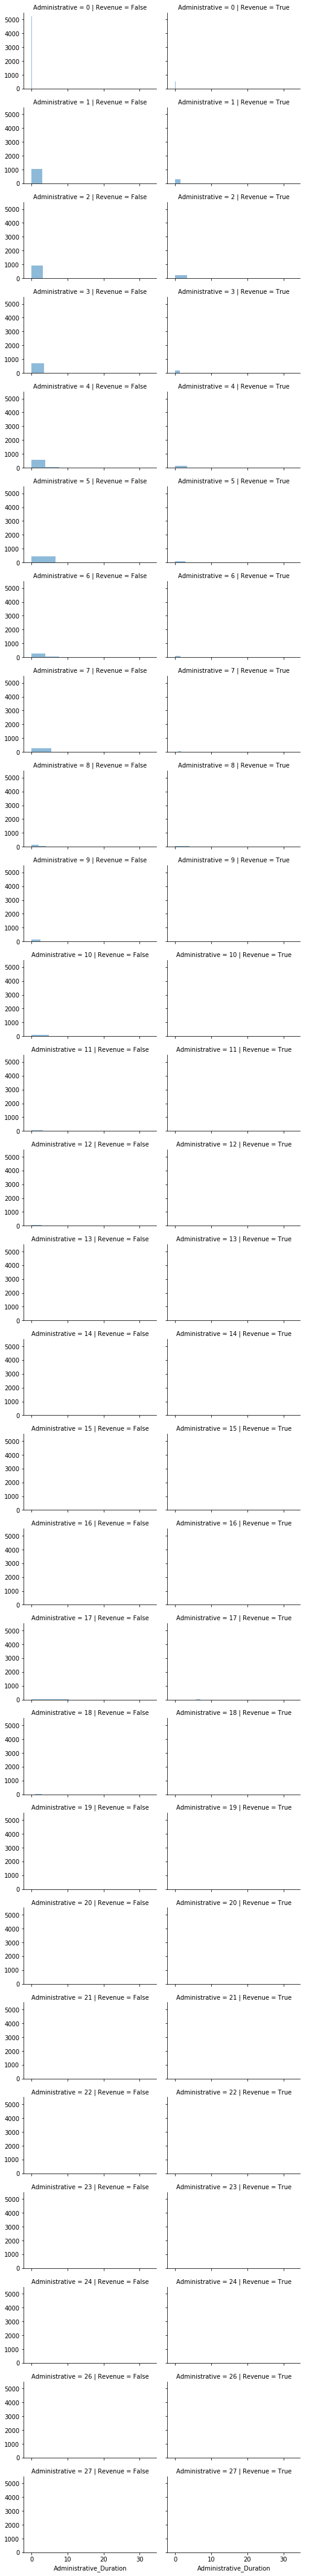

In [6]:
see1['Administrative'] = see['Administrative']

grid = sns.FacetGrid(see1 , col='Revenue', row='Administrative', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Administrative_Duration', alpha=.5, bins=5)
grid.add_legend();

In [7]:
see['Revenue'].mean()

0.15474452554744525

### found so far
* we tried to find if there are any connection between **Administrative_Duration**, **Administrative** and **Revenue**.
    * data is mostly distributed in between 2 and 8 of **Administrative** 
    * when **Administrative** equals 6 **Administrative_Duration** seems to be bigger
    * most **Revenue** are 0. (only 15% of **Revenue** are 1)

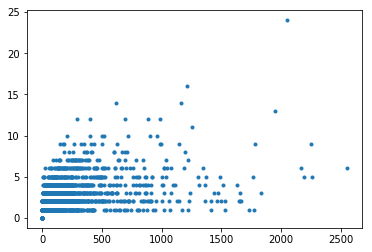

In [8]:
plt.plot(see['Informational_Duration'], see['Informational'], '.')

* can't see any clear relationship between  **Informational_Duration**	and **Informational**, the durations are mostly located at around 0 too 500, no matter the Informational

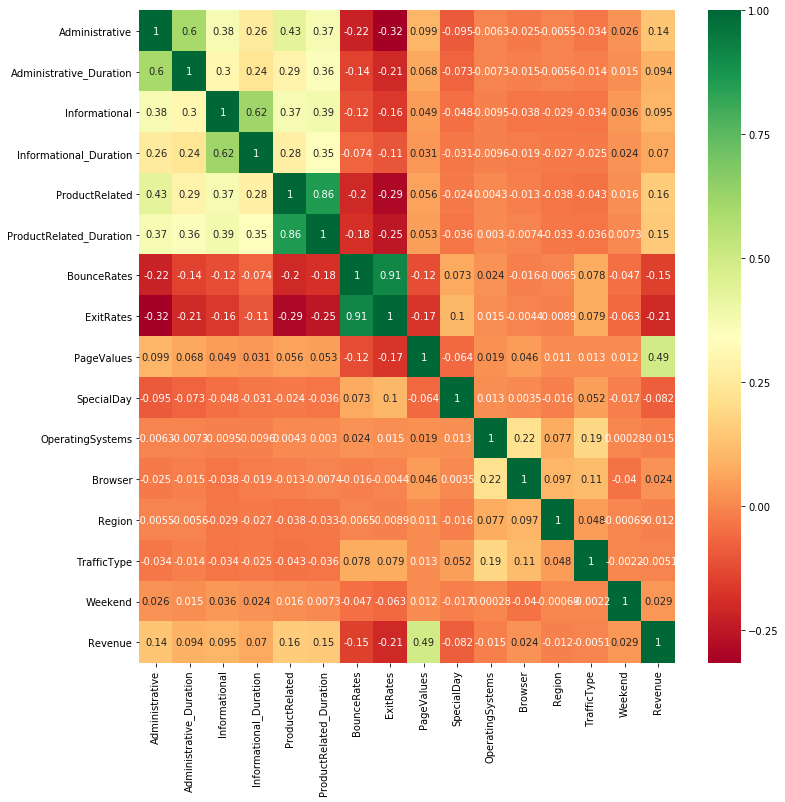

In [9]:
correlation = see.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation,  annot=True, cbar=True, cmap="RdYlGn")

* **Revenue** and **Page value** are mostly related, even though it just about 0.4

# Question Define
## Question
* Predict ***Revenue*** according to the given attributes

## Attributes
* **Administrative**
* **Administrative Duration**
* **Informational**
* **ProductRelated**
* **ProductRelated Duration**
* **Page Values**

In [10]:
data = shop_data[['Administrative', 'Administrative_Duration', 'Informational', 'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'Revenue']]

x = data.drop(columns='Revenue')
y = data['Revenue']

train_x = x[:10000]
test_x = x[10000:]
train_y = y[:10000]
test_y = y[10000:]


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz

import pydotplus

In [13]:
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(train_x,train_y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(train_x),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

# Generated Tree
![caption](files/tree2.png)

* most **information gain** came from **PageValues** and **Administrative**
* this leads to the result that I only use  **PageValues** and **Administrative** for the up coming models.

In [14]:
dtree.feature_importances_

array([0.01745654, 0.00397023, 0.        , 0.0274515 , 0.00637939,
       0.94474234])

In [15]:
# accuracy of the decision tree
dtree.score(test_x, test_y, sample_weight=None)

0.8437768240343347

In [16]:
1-test_y.mean()

0.7995708154506438

* By guessing all *false*, you get accuracy of 0.799
* Our *decision tree* predicted accuracy was 0.843
* It shows that the most importent attribute is *PageValue* (0.94)

## k-means
### Attribute
* since we have learned that two of the most important attributes are *ProductRelated*(0.0274515) and *PageValues*(.94474234), and it would be better if we can visualise how it clusters. So we only use these two attributes in the follow model

[1 1 1 ... 1 0 1]


Text(0.5, 1.0, 'real')

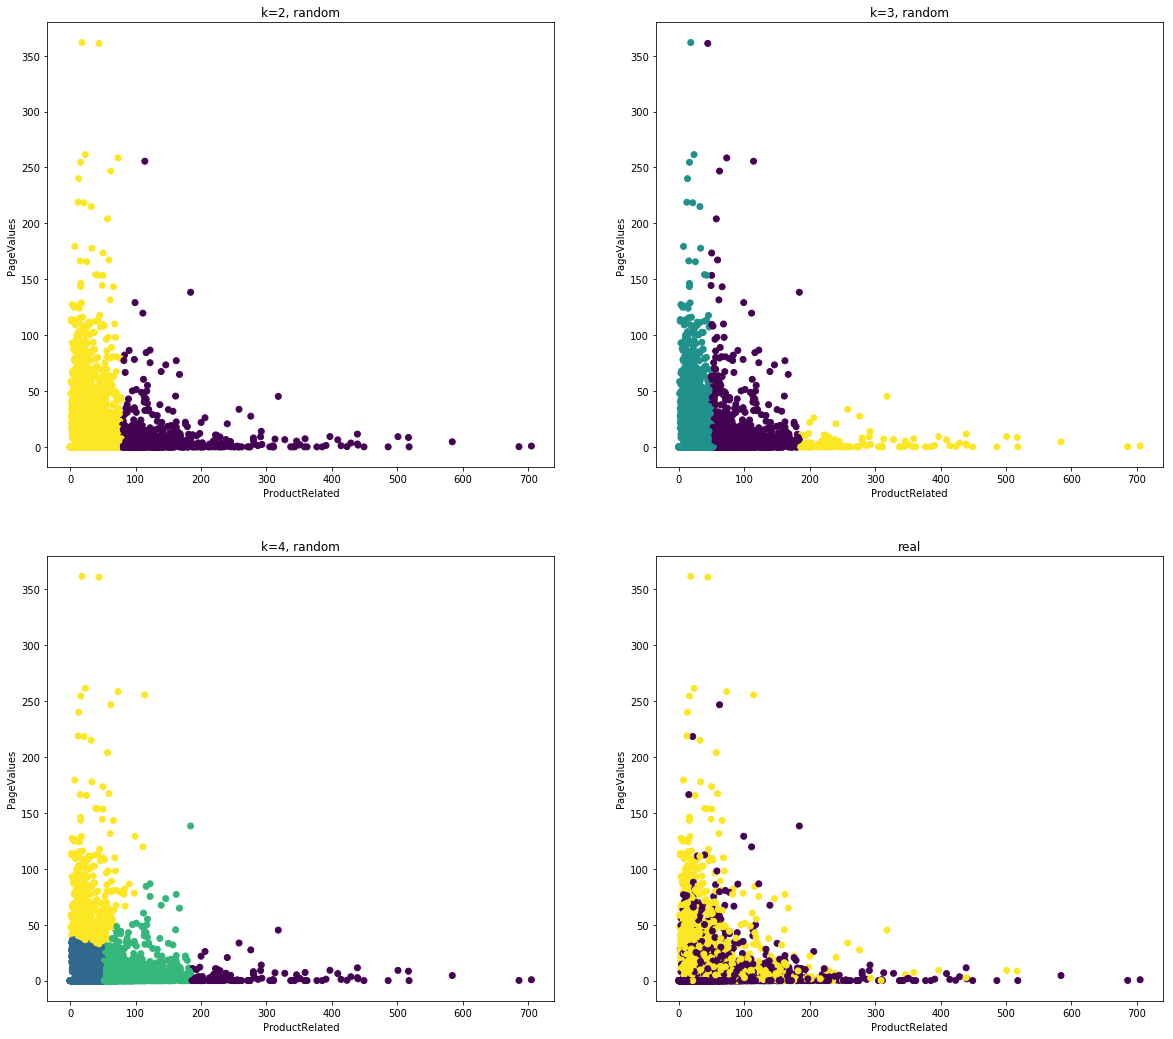

In [17]:
# start with k = 2~4, and initialization method = random

from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(figsize=(20, 18))

X = train_x[['ProductRelated', 'PageValues']]

kmeans = KMeans(n_clusters=2, init = 'random', random_state=0).fit(X)
y_pred = kmeans.predict(X)

print(y_pred)
plt.subplot(221)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y_pred)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=2, random')

kmeans = KMeans(n_clusters=3, init = 'random', random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.subplot(222)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y_pred)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=3, random')

kmeans = KMeans(n_clusters=4, init = 'random', random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.subplot(223)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y_pred)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=4, random')

plt.subplot(224)
plt.scatter(X['ProductRelated'], X['PageValues'], c= train_y)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('real')

* k=2,3,4 did pretty badly compare to the actual distribution
* try different initialization (k means ++)

Text(0.5, 1.0, 'real')

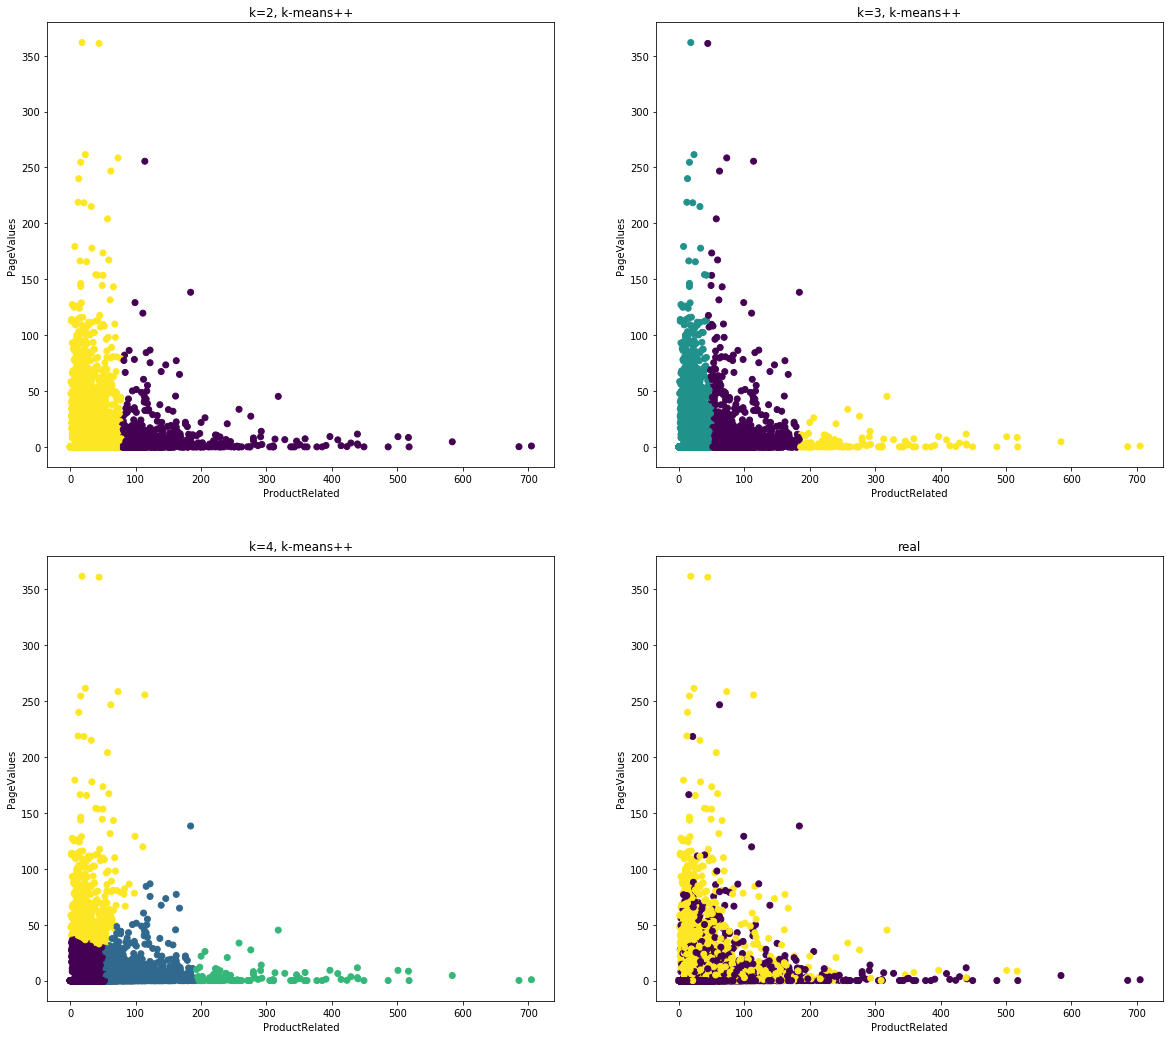

In [18]:
# start with k = 2~4, and initialization method = k-means++

from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
figure(figsize=(20, 18))

X = train_x[['ProductRelated', 'PageValues']]

kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.subplot(221)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y_pred)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=2, k-means++')

kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.subplot(222)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y_pred)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=3, k-means++')

kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.subplot(223)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y_pred)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=4, k-means++')

plt.subplot(224)
plt.scatter(X['ProductRelated'], X['PageValues'], c= train_y)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('real')

* apparently nothing change

# Method

## reason
* I can't find much way to eveluate the model om the internet
* even if there are any they mostly work when the number of clusters is the same as predicted value options.(clusters = 2, predict: true/false)
* so I think of a way to eveluate,  when k is much higher than the predicted value options. (k = 120,  predict: true/false)

## how
* k = 120, init = k-means++
* assign each cluster to either '1' or '0' based on the most frequent type in the cluster.
![caption](files/method.png)
* then, use these clusters to predict test set

Text(0.5, 1.0, 'real')

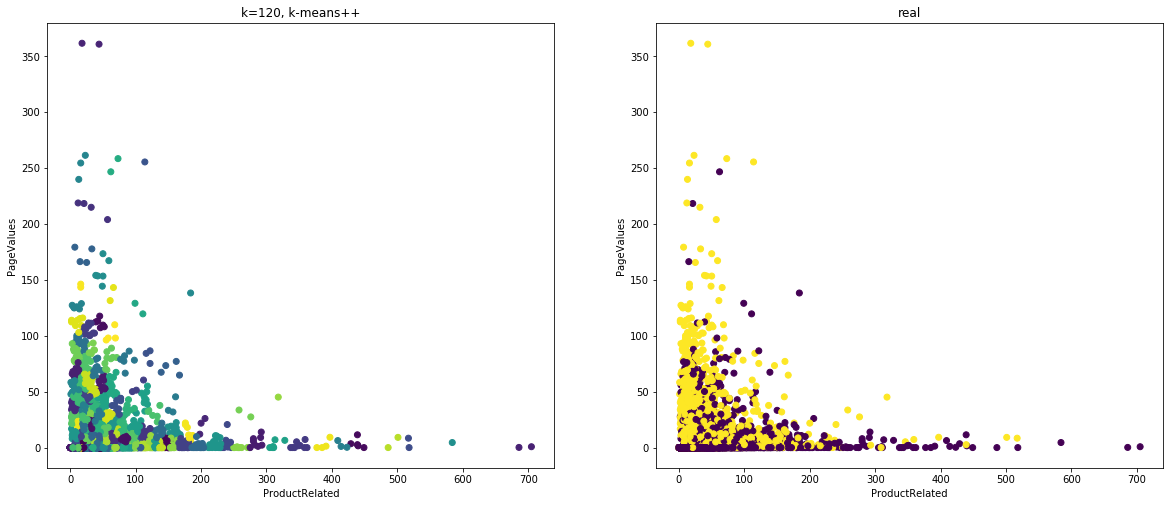

In [45]:
# k = 120, init = k-means++
figure(figsize=(20, 18))

kmeans = KMeans(n_clusters=120, init = 'k-means++', random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.subplot(221)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y_pred)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=120, k-means++')

plt.subplot(222)
plt.scatter(X['ProductRelated'], X['PageValues'], c= train_y)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('real')

In [54]:
# determine if each cluster is a "1" or "0", based on most of the points in the cluster
centers = pd.DataFrame(kmeans.cluster_centers_) # centers of the result of k-means algo
centers['label'] = 0

y = pd.DataFrame()
y['pred'] = y_pred
y['real'] = train_y
new = 0

for i in range(120):
    at = y.loc[y['pred'] == i]
    
    if at.real.mode()[0] == 0:
        new = 0
    else:
        new = 1
    centers['label'][i] = new
    
    for num in at.index:
        y['pred'][num] = new

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'real')

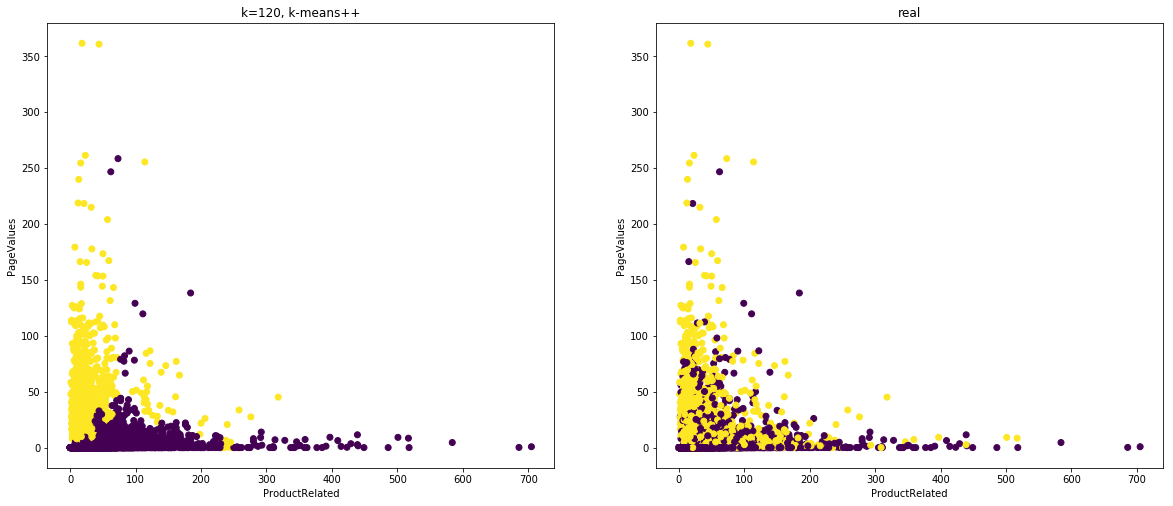

In [47]:
figure(figsize=(20, 18))

plt.subplot(221)
plt.scatter(X['ProductRelated'], X['PageValues'], c= y['pred'])
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=120, k-means++')

plt.subplot(222)
plt.scatter(X['ProductRelated'], X['PageValues'], c= train_y)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('real')

* we have finish assigning each clusters to either '1' or '0' 
* let's see this method's ***training accuracy***, which is ***0.9057***

In [55]:
k_120 = y['pred']
from sklearn.metrics import accuracy_score
accuracy_score(k_120, train_y)

0.9057

In [77]:
centers.tail()

,0,1,label
115,13.584906,19.812420,1
116,387.500000,2.623162,0
117,180.714286,14.006837,0
118,16.000000,144.857714,1
119,62.500000,100.550588,1


Text(0.5, 1.0, 'k=120, k-means++, real')

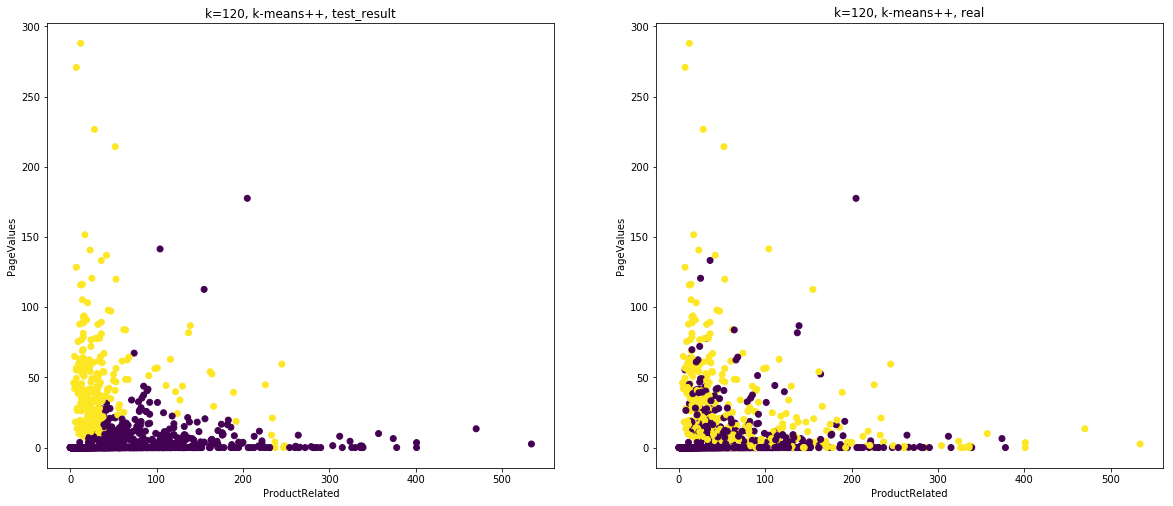

In [80]:
# test the reault above in the test set
#testing =  KMeans(n_clusters=120, init = centers[:1]).predict(test_x)
testing = kmeans.predict(test_x[['ProductRelated', 'PageValues']])

for i in range(len(testing)):
      testing[i] = centers['label'][testing[i]]


figure(figsize=(20, 18))
plt.subplot(221)
plt.scatter(test_x['ProductRelated'], test_x['PageValues'], c= testing)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=120, k-means++, test_result')

plt.subplot(222)
plt.scatter(test_x['ProductRelated'], test_x['PageValues'], c= test_y)
plt.ylabel('PageValues')
plt.xlabel('ProductRelated')
plt.title('k=120, k-means++, real')

In [79]:
accuracy_score(testing, test_y)

0.8450643776824034

* testing accuracy = 0.845

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logi_model = LogisticRegression()
logi_model.fit(train_x, train_y)
    
logi_pred = logi_model.predict(test_x)
print(accuracy_score(test_y, logi_pred))

0.8403433476394849


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

std_train_x = scaler.transform(train_x)
std_test_x = scaler.transform(test_x)

logi_model = LogisticRegression()
_=logi_model.fit(std_train_x, train_y)
    
logi_pred = logi_model.predict(std_test_x)
print(accuracy_score(test_y, logi_pred))

0.8403433476394849


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVM

In [86]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(std_train_x, train_y)

svm_pred = svm_model.predict(std_test_x)
print(accuracy_score(test_y, svm_pred))

0.8472103004291845


In [87]:
svm_model = svm.SVC(kernel='poly', degree=2)
svm_model.fit(std_train_x, train_y)

svm_pred = svm_model.predict(std_test_x)
print(accuracy_score(test_y, svm_pred))

0.827038626609442


* try different penalty and see if it get better

In [192]:
c = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]
train_acc = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
test_acc = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

where = 0
for cs in c:
    print(where)
    svm_model = svm.SVC(C = cs, random_state=42)
    svm_model.fit(std_train_x, train_y)

    svm_pred = svm_model.predict(std_test_x)
    train_acc[where] = accuracy_score(test_y, svm_pred)
    
    svm_model = svm.SVC(kernel='poly', degree=2)
    svm_model.fit(std_train_x, train_y)

    svm_pred = svm_model.predict(std_test_x)
    test_acc[where] = accuracy_score(test_y, svm_pred)
    where = where + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


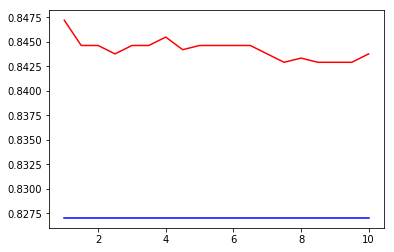

In [194]:
plt.plot(c, train_acc, 'r-', c, test_acc, 'b-')
plt.show()

# Neural Network

In [89]:
from keras import models, layers, optimizers, regularizers

model = models.Sequential()

model.add(layers.Dense(input_dim=train_x.shape[1],
                       units=32, 
                       activation='relu'))

model.add(layers.Dense(units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
history = model.fit(std_train_x, 
                    train_y, 
                    epochs=40, 
                    validation_data=(std_test_x, test_y),
                    verbose=False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


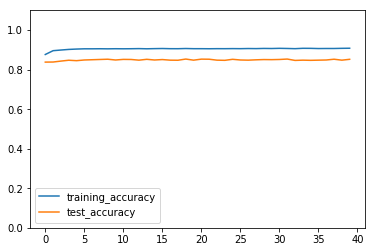

In [90]:
plt.plot(history.history['acc'])
plt.ylim(0, 1.1)
plt.plot(history.history['val_acc'])
plt.legend(['training_accuracy', 'test_accuracy'])

In [96]:
pred = model.predict_classes(std_test_x)
print(accuracy_score(test_y, pred))

0.8523605150214593


In [207]:
model2 = models.Sequential()

model2.add(layers.Dense(input_dim=train_x.shape[1],
                       units=128, 
                       activation='relu'))

model2.add(layers.Dense(input_dim=128,
                       units=128, 
                       activation='relu'))

model2.add(layers.Dense(input_dim=128,
                       units=64, 
                       activation='relu'))

model2.add(layers.Dense(units=1,
                       activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()
history = model2.fit(std_train_x, 
                    train_y, 
                    epochs=40, 
                    validation_data=(std_test_x, test_y),
                    verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 25,729
Trainable params: 25,729
Non-trainable params: 0
_________________________________________________________________


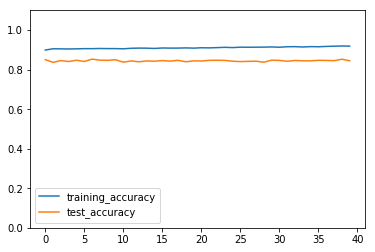

In [208]:
plt.plot(history.history['acc'])
plt.ylim(0, 1.1)
plt.plot(history.history['val_acc'])
plt.legend(['training_accuracy', 'test_accuracy'])

In [209]:
pred = model2.predict_classes(std_test_x)
print(accuracy_score(test_y, pred))

0.8450643776824034


# Summary

## data analysis and prepocessing

### analysis
* found out the most relevent attributes and apply them into models.
* Administrative, Administrative Duration, Informational, ProductRelated, ProductRelated Duration, PageValues

### prepocessing
* Data Standardization, even though it doesn't really help here.

## ML model

### Decision Tree
* 3 layers
* test accuracy: 0.8437768240343347
* show us that **PageValues** is the most relevent attribute.

### k-means
* try out different **k** and different **initailization method**
    * higher the k, better the clustering
    * can't see any obvious prove that **k-means++** is better than **randomise**
* try my method (at least I haven't seen anyone tried this on the internet)
    * training accuracy: 0.9057
    * testing accuracy: 0.8450643776824034 (not bad)
    
### Logistic Regression
    * training accuracy: 0.8403433476394849
    * testing accuracy: 0.8403433476394849
    
### SVM
* try out different penalties to see if it can be imporved (apparently not)
* training accuracy:0.8472103004291845
* testing accuracy:0.827038626609442

### NN
* try different amount of nodes and layers
* one layer: 0.8523605150214593
* three layers: 0.8450643776824034

## what more can I do
### solve data imbalancing
* if tried using ***BorderlineSMOTE*** to solve this problem, but our data is all massed up, it can't generated any
